In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [73]:
train_data= pd.read_csv("train_data.csv")

In [74]:
train_data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.949275,0.883333,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.936364,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.753623,0.433333,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.690909,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.934783,0.866667,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.918182,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.311594,0.333333,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.890909,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.927536,0.833333,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.909091,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [75]:
train_data.shape

(1460, 84)

In [76]:
## Capture the dependent feature
y_train=train_data[['SalePrice']]

In [77]:
## drop dependent feature from dataset
X_train=train_data.drop(['Id','SalePrice'],axis=1)

In [78]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [79]:
feature_sel_model.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [80]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 82
selected features: 21
features with coefficients shrank to zero: 61


In [81]:
selected_feat

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'YearRemodAdd',
       'RoofStyle', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'SaleCondition'],
      dtype='object')

In [82]:
X_train=X_train[selected_feat]

In [83]:
 X_train.head()

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
0,0.235294,0.75,0.636364,0.666667,0.883333,0.0,0.75,0.25,1.00,1.0,0.356155,0.577712,0.333333,0.666667,0.000000,0.2,0.8,0.666667,0.50,1.0,0.75
1,0.000000,0.75,0.500000,0.555556,0.433333,0.0,0.75,1.00,1.00,1.0,0.503056,0.470245,0.000000,0.333333,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
2,0.235294,0.75,0.636364,0.666667,0.866667,0.0,0.75,0.50,1.00,1.0,0.383441,0.593095,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
3,0.294118,0.75,0.727273,0.666667,0.333333,0.0,0.50,0.25,0.75,1.0,0.399941,0.579157,0.333333,0.666667,0.333333,0.8,0.4,0.333333,0.75,1.0,0.00
4,0.235294,0.75,1.000000,0.777778,0.833333,0.0,0.75,0.75,1.00,1.0,0.466237,0.666523,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.75,1.0,0.75


In [84]:
X_train.shape

(1460, 21)

In [85]:
# Import Sci-Kit Learn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold

# Ensemble Models
from xgboost import XGBRegressor


In [86]:
# Use train_test_split from sci-kit learn to segment our data into train and a local testset
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

# Define Evaluation Metric

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

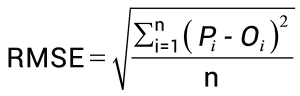

# We will write a function named rmse to perform this task.

In [87]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred)))

# Linear Regression

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()

lin_regressor.fit(X_train, y_train)
mse=cross_val_score(lin_regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-0.01585684786667778


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [90]:
prediction_linear = lin_regressor.predict(X_test)

In [91]:
score = lin_regressor.score(X_test, y_test)
print(score)

0.9102791074497628


In [92]:
rmse(y_test, prediction_linear)

0.009807010447166985

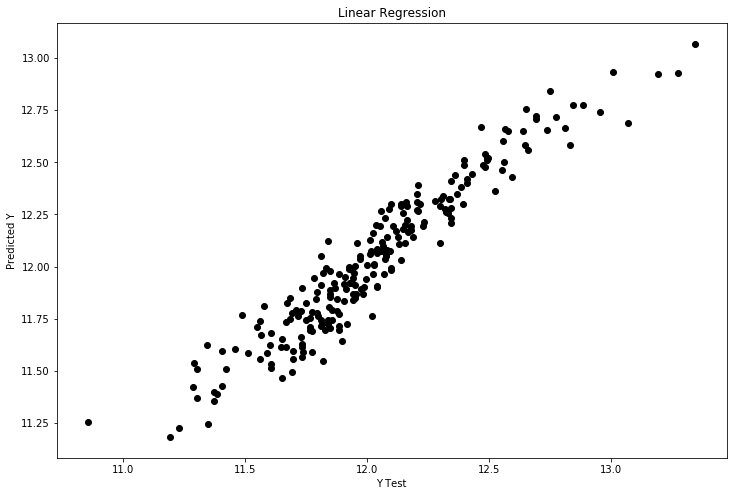

In [93]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,prediction_linear, c= 'black')
plt.title("Linear Regression")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Ridge Regression

In [94]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [95]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-0.015981522042683934


In [96]:
prediction_ridge=ridge_regressor.predict(X_test)


In [97]:
rmse(y_test, prediction_ridge)

0.010049460088175212

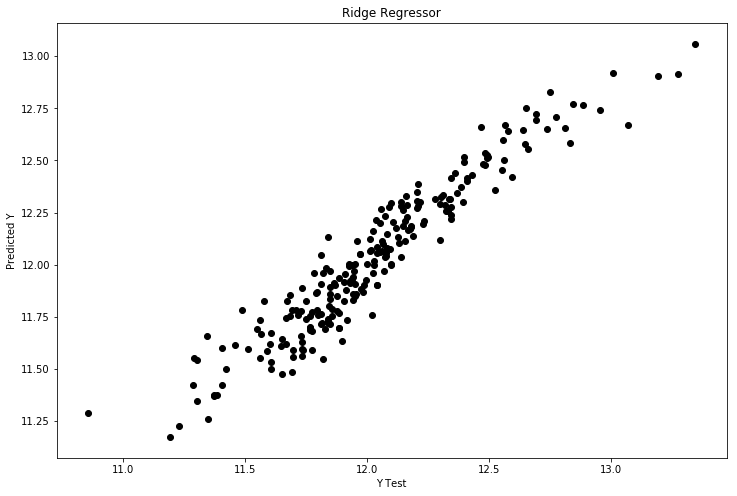

In [98]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,prediction_ridge, c= 'black')
plt.title("Ridge Regressor")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Lasso Regression

In [99]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-15}
-0.01598192535821114


In [100]:
prediction_lasso=lasso_regressor.predict(X_test)

 

In [101]:
rmse(y_test, prediction_lasso)

0.010049400848188221

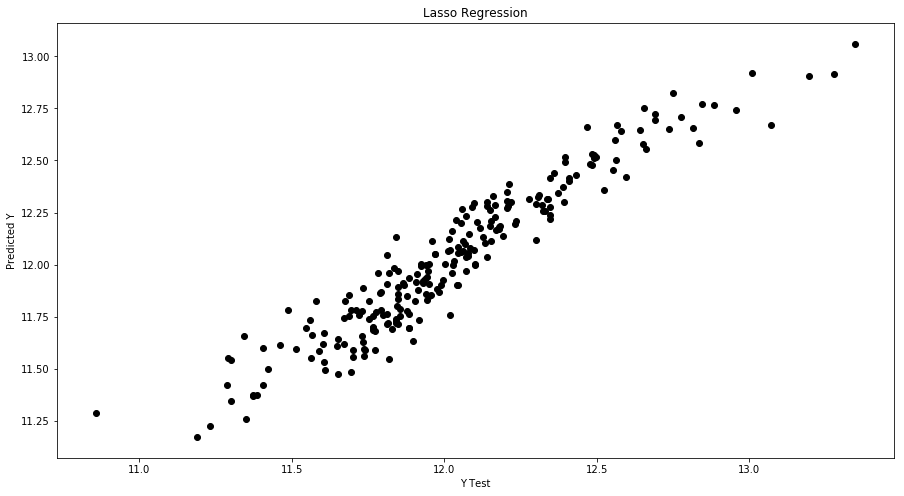

In [102]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,prediction_lasso, c= 'black')
plt.title("Lasso Regression")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Random Forest

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging.Bagging, in the Random Forest method, involves training each decision tree on a different data sample where sampling is done with replacement.

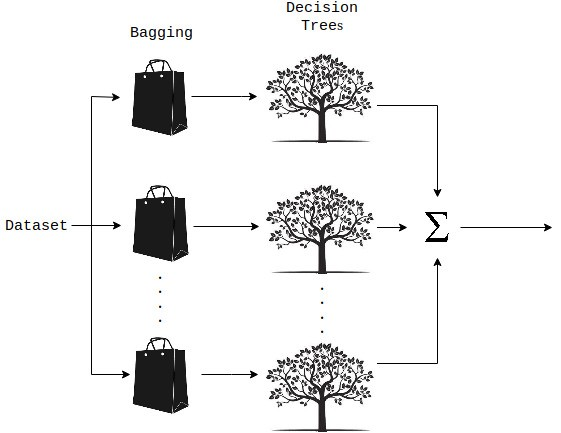

In [103]:
# Initialize the model
random_forest = RandomForestRegressor(n_estimators=1200,
                                      max_depth=15,
                                      min_samples_split=5,
                                      min_samples_leaf=5,
                                      max_features=None,
                                      random_state=42,
                                      oob_score=True
                                     )

# Perform cross-validation to see how well our model does 
kf = KFold(n_splits=5)
y_pred = cross_val_score(random_forest, X_train, y_train, cv=kf, n_jobs=-1)
y_pred.mean()

0.8754199679659361

In [104]:
# Fit the model to our data
random_forest.fit(X_train, y_train)

C:\Users\Mahesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=1200,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=False)

In [105]:
# Make predictions on test data
rf_pred = random_forest.predict(X_test)

In [106]:
score = random_forest.score(X_test, y_test)
print(score)

0.8912995413573988


In [107]:
rmse(y_test, rf_pred)

0.010766428957014225

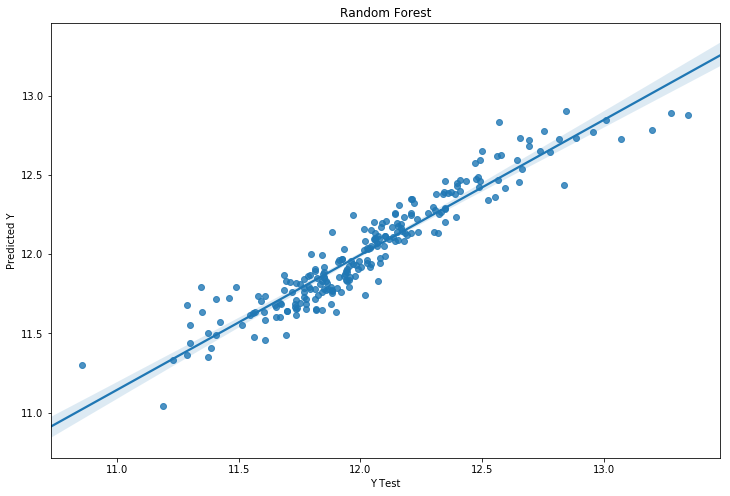

In [108]:
plt.figure(figsize=(12,8))
sns.regplot(x=y_test,y=rf_pred,truncate=False)
plt.title("Random Forest")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# XGBoost Without Hyper parameter tuning

Note: I found that our standalone XGBoost model in itself gives a good score. I suggest you to check it out.

In [109]:
# Initialize our model
xg_boost = XGBRegressor( learning_rate=0.01,
                         n_estimators=6000,
                         max_depth=4, min_child_weight=1,
                         gamma=0.6, subsample=0.7,
                         colsample_bytree=0.2,
                         objective='reg:linear', nthread=-1,
                         scale_pos_weight=1, seed=27,
                         reg_alpha=0.00006
                       )

# Perform cross-validation to see how well our model does 
kf = KFold(n_splits=5)
y_pred = cross_val_score(xg_boost, X_train, y_train, cv=kf, n_jobs=-1)
y_pred.mean()

0.8738802632852227

In [110]:
# Fit our model to the training data
xg_boost.fit(X_train,y_train)

[16:11:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0.6,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=6000,
             n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
             reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1, seed=27,
             silent=None, subsample=0.7, verbosity=1)

In [111]:
# Make predictions on the test data
xgb_pred = xg_boost.predict(X_test)

In [112]:
rmse(y_test, xgb_pred)

0.01114896018741464

In [113]:
score = xg_boost.score(X_test, y_test)
print(score)

0.8830434498399523


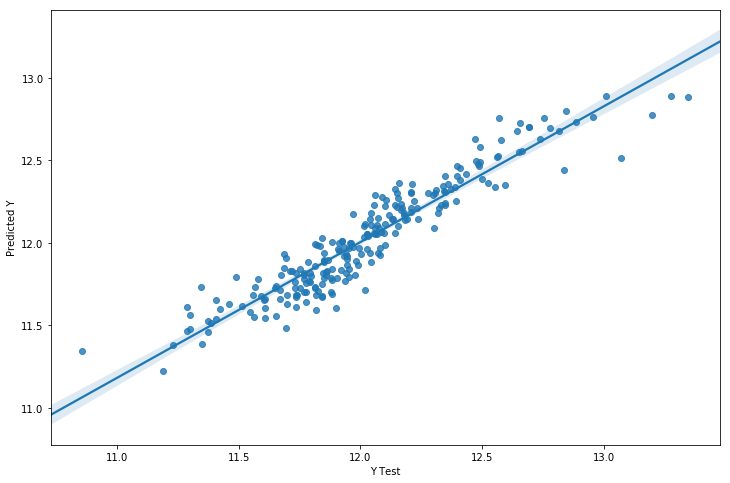

In [114]:
plt.figure(figsize=(12,8))

sns.regplot(x=y_test,y=xgb_pred,truncate=False)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Gradient Boost Regressor

Gradient Boosting trains many models in a gradual, additive and sequential manner. The major difference between AdaBoost and Gradient Boosting Algorithm is how the two algorithms identify the shortcomings of weak learners (eg. decision trees). While the AdaBoost model identifies the shortcomings by using high weight data points, gradient boosting performs the same by using gradients in the loss function (y=ax+b+e , e needs a special mention as it is the error term). The loss function is a measure indicating how good are model’s coefficients are at fitting the underlying data. A logical understanding of loss function would depend on what we are trying to optimise. We are trying to predict the sales prices by using a regression, then the loss function would be based off the error between true and predicted house prices.

In [115]:
# Initialize our model
g_boost = GradientBoostingRegressor( n_estimators=6000, learning_rate=0.01,
                                     max_depth=5, max_features='sqrt',
                                     min_samples_leaf=15, min_samples_split=10,
                                     loss='ls', random_state =42
                                   )

# Perform cross-validation to see how well our model does 
kf = KFold(n_splits=5)
y_pred = cross_val_score(g_boost, X_train, y_train, cv=kf, n_jobs=-1)
y_pred.mean()

0.8963261075174564

In [116]:
# Fit our model to the training data
g_boost.fit(X_train,y_train)

C:\Users\Mahesh\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=5,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=6000,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [117]:
# Make predictions on test data
gbm_pred = g_boost.predict(X_test)

In [118]:
rmse(y_test, gbm_pred)

0.009805528546906504

In [119]:
score = g_boost.score(X_test, y_test)
print(score)

0.9110238156242192


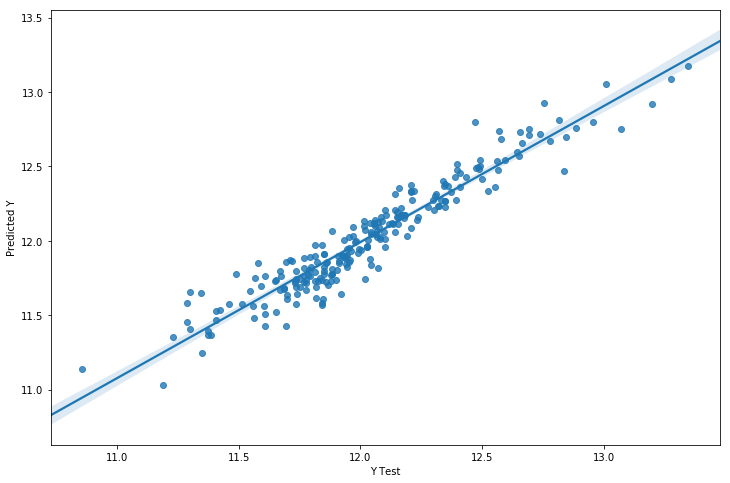

In [120]:
plt.figure(figsize=(12,8))
sns.regplot(x=y_test,y=gbm_pred,truncate=False)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# XGBoost With Hyper parameter tuning

In [121]:
# List of the models to be stacked
models = [g_boost, xg_boost, random_forest]

In [122]:
import xgboost
classifier=xgboost.XGBRegressor()

In [123]:
import xgboost
regressor=xgboost.XGBRegressor()

In [124]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [125]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [126]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [127]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   27.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   46.9s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.1min finished


[16:13:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree',

In [128]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [129]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [130]:
regressor.fit(X_train,y_train)

[16:13:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [131]:
xgb_pred = regressor.predict(X_test)

In [132]:
rmse(y_test, xgb_pred)

0.009684458199102327

In [133]:
score = regressor.score(X_test, y_test)
print(score)


0.9140683659926438


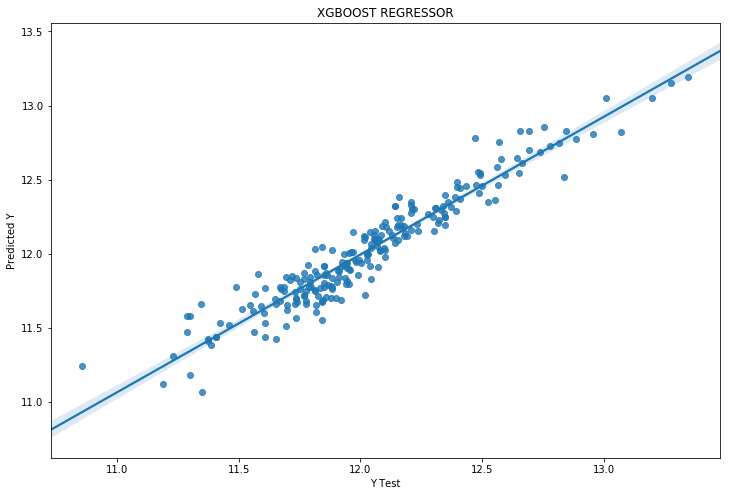

In [134]:
plt.figure(figsize=(12,8))
sns.regplot(x=y_test,y=xgb_pred,truncate=False)
plt.title("XGBOOST REGRESSOR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()


# Decision Tree Regressor

Decision tree algorithm is classification algorithm under supervised machine learning and it is simple to understand and use in data. The idea of Decision tree is to split the big data(root) into smaller(leaves)

Background A decision tree is a flow-chart-like structure, where each internal (non-leaf) node denotes a test on an attribute, each branch represents the outcome of a test, and each leaf (or terminal) node holds a class label. The topmost node in a tree is the root node.

In [135]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=100, splitter='best')

In [136]:
dtr_pred = dtreg.predict(X_test)


In [137]:
rmse(y_test, dtr_pred)

0.015576556415026688

In [138]:
score = dtreg.score(X_test, y_test)
print(score)

0.7789913208395965


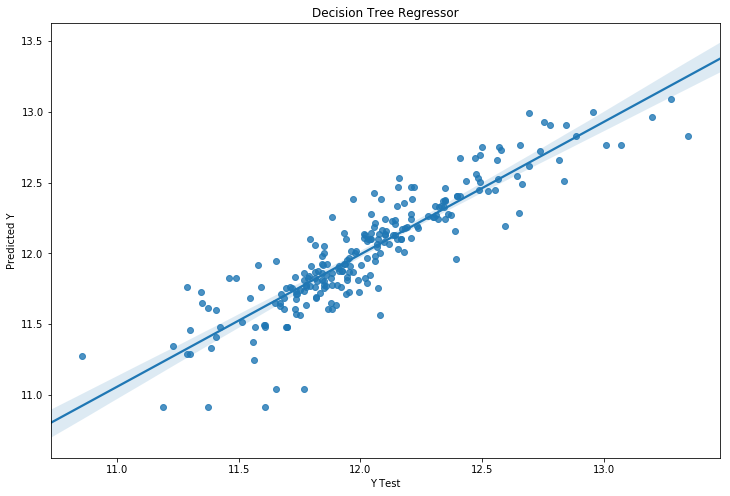

In [139]:
plt.figure(figsize=(12,8))
sns.regplot(x=y_test,y=dtr_pred,truncate=False)
plt.title("Decision Tree Regressor")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Model Comparison

We can say the best working model by loking RMSE rates The best working model is XGBoost Regresoor. We are going to see the error rate. which one is better?

In [140]:
error_rate=np.array([rmse(y_test, prediction_linear),rmse(y_test, rf_pred),rmse(y_test, dtr_pred),rmse(y_test, gbm_pred),rmse(y_test, xgb_pred)])

In [141]:
error_rate

array([0.00980701, 0.01076643, 0.01557656, 0.00980553, 0.00968446])

In [143]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model",  "Error", "Score"]

x.add_row(["XG Boost", 0.00968446, 91.40])
x.add_row(["Gradient Boost", 0.00980553, 91.1])
x.add_row(["Linear Regression", 0.00980701, 91.02])
x.add_row(["Random Forest",0.01076643, 89.12 ])
x.add_row(["Decision Tree", 0.01557656, 77.89])
print(x)

+-------------------+------------+-------+
|       Model       |   Error    | Score |
+-------------------+------------+-------+
|      XG Boost     | 0.00968446 |  91.4 |
|   Gradient Boost  | 0.00980553 |  91.1 |
| Linear Regression | 0.00980701 | 91.02 |
|   Random Forest   | 0.01076643 | 89.12 |
|   Decision Tree   | 0.01557656 | 77.89 |
+-------------------+------------+-------+


In the above table, we compare the different models and its RMSE values. And we observed that XG Boost gives the best value when compared to all other models.